<a href="https://colab.research.google.com/github/aozdl/Time-Series-Project/blob/main/Time_Series_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Importing and unzipping dataset

In [2]:
#install Kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayseozdel","key":"bf9f32f389f3708ff993c745d70c2cc4"}'}

In [4]:
#create a kaggle folder
!mkdir ~/.kaggle

In [5]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [6]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57          13545        278  1.0              
owm4096/laptop-prices                                            Laptop Prices                                        25KB  2024-09-09 12:43:01           3630         65  1.0              
muhammadehsan02/global-football-results-18722024                 Global Football Results: (1872–2024)                  1MB  2024-09-04 10:00:52           1258         27  1.0              
nyagami/ea-sports-fc-25-database-ratings-and-stats     

In [9]:
! kaggle competitions download -c acea-water-prediction

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 112MB/s]


In [10]:
!unzip acea-water-prediction.zip

Archive:  acea-water-prediction.zip
  inflating: Aquifer_Auser.csv       
  inflating: Aquifer_Doganella.csv   
  inflating: Aquifer_Luco.csv        
  inflating: Aquifer_Petrignano.csv  
  inflating: Lake_Bilancino.csv      
  inflating: River_Arno.csv          
  inflating: Water_Spring_Amiata.csv  
  inflating: Water_Spring_Lupa.csv   
  inflating: Water_Spring_Madonna_di_Canneto.csv  
  inflating: datasets_description.ods  
  inflating: datasets_description.xlsx  


# Loading the Dataset

In [11]:
df = pd.read_csv("/content/Aquifer_Petrignano.csv")

df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

,0
Date,0
Rainfall_Bastia_Umbra,1024
Depth_to_Groundwater_P24,55
Depth_to_Groundwater_P25,39
Temperature_Bastia_Umbra,1024
Temperature_Petrignano,1024
Volume_C10_Petrignano,198
Hydrometry_Fiume_Chiascio_Petrignano,1024


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [14]:
df.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [15]:
df_cleaned = df.dropna()

In [16]:
# Convert the 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the mean of numerical columns only
df_filled = df.fillna(df.select_dtypes(include=['number']).mean())

<ipython-input-16-4d5f22bf95d3>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


# Data Processing

In [17]:
# Select the numerical columns
numeric_features = ['Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25',
                    'Temperature_Bastia_Umbra', 'Temperature_Petrignano', 'Volume_C10_Petrignano',
                    'Hydrometry_Fiume_Chiascio_Petrignano']

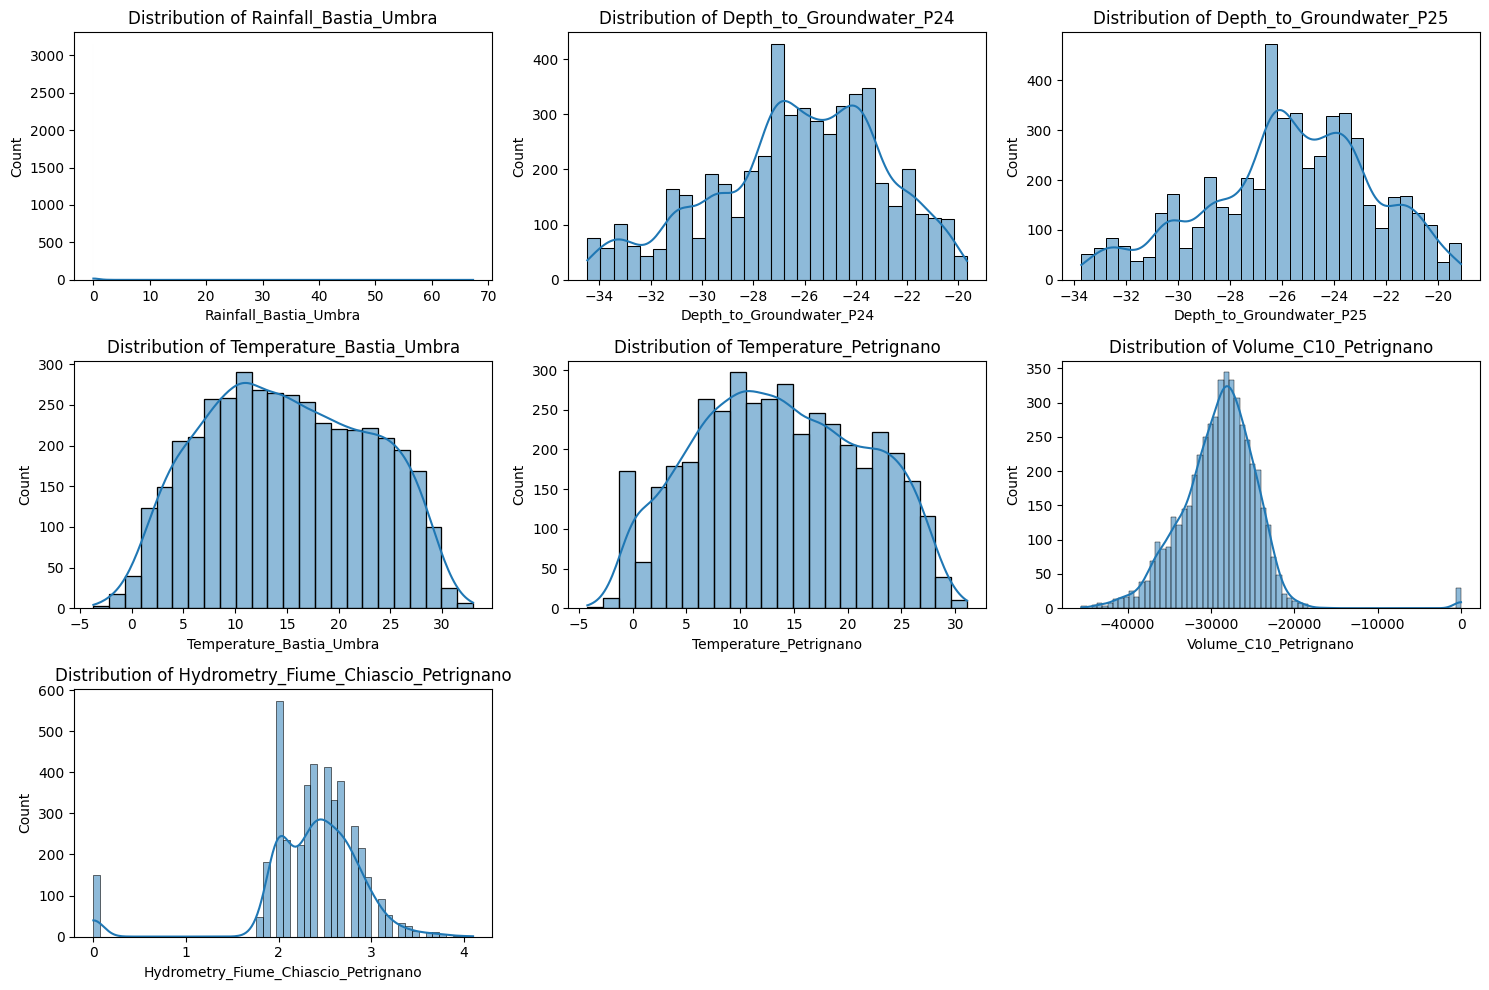

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

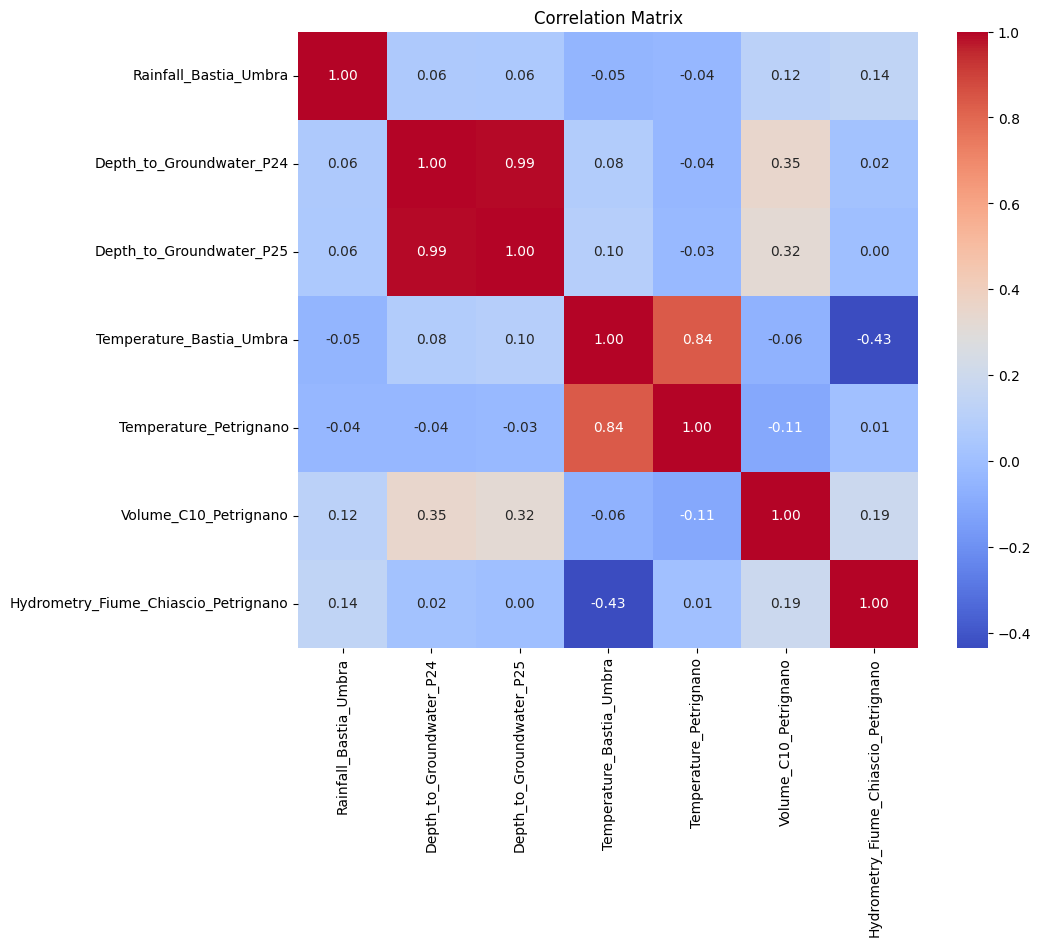

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_filled[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

# Preparing Data for modeling

In [21]:
target = 'Volume_C10_Petrignano'

# Features (X) and target (y)
X = df_scaled.drop(columns=[target])
y = df_scaled[target]

# Step 8: Split Data into Training and Test Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.columns)

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')


In [25]:
# Assuming 'date_column' is the name of your date column
X_train['date_column_year'] = X_train['Date'].dt.year
X_train['date_column_month'] = X_train['Date'].dt.month
X_train['date_column_day'] = X_train['Date'].dt.day
X_train = X_train.drop(columns=['Date'])

In [26]:
# Apply the same transformation to the test set
X_test['date_column_year'] = X_test['Date'].dt.year
X_test['date_column_month'] = X_test['Date'].dt.month
X_test['date_column_day'] = X_test['Date'].dt.day

In [27]:
# Drop the original 'date_column' if needed
X_test = X_test.drop(columns=['Date'])

In [28]:
# Create an imputer to fill NaN with the mean
imputer = SimpleImputer(strategy='mean')

In [29]:
# Fit the imputer on the training data and transform both training and test data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [30]:
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train = y_train.flatten()

In [31]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
RandomForestRegressor(random_state=42)

RandomForestRegressor(random_state=42)

In [33]:
y_pred = model.predict(X_test)

In [35]:
# Impute missing values in y_test
y_test = imputer.transform(y_test.values.reshape(-1, 1)) # Add .values to access the NumPy array and then reshape
y_test = y_test.flatten()

In [36]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.5713655867603775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


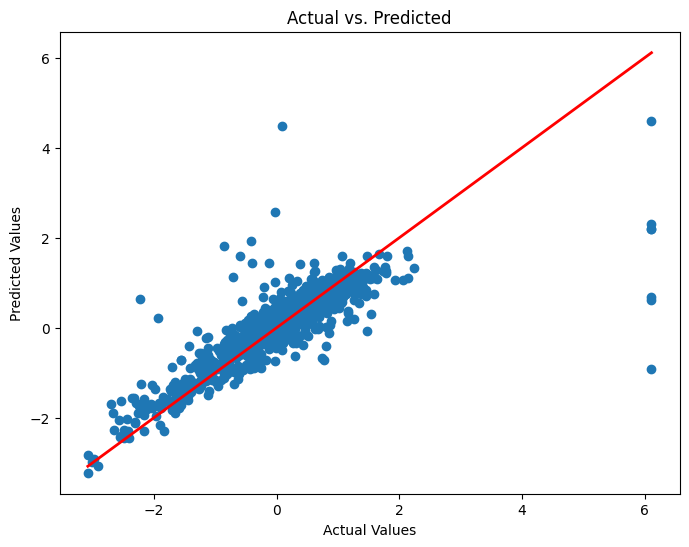

In [37]:
#Visualize Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Ideal 1:1 line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

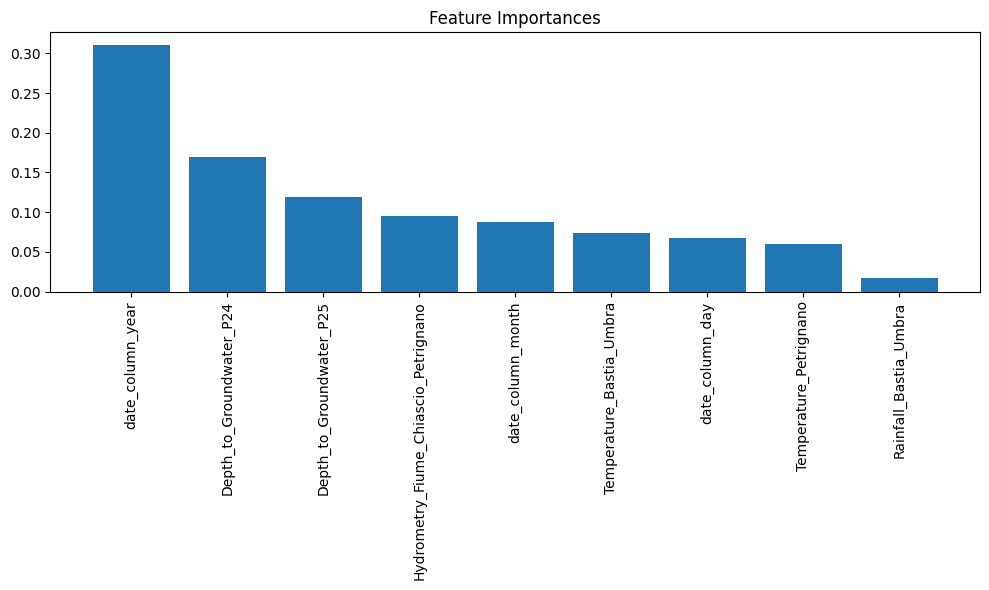

In [38]:
#Visualize Feature Importance
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()